In [88]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [66]:
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# Determine the index of your table

In [67]:
df = pd.read_html(html, header = 0)[0]


# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

In [68]:
df = df[df["Borough"] != 'Not assigned']

In [69]:
df

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Etobicoke,Islington Avenue
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern


# More than one neighborhood can exist in one postal code area

In [70]:
df = df.groupby(['Postcode', 'Borough'])['Neighbourhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()


# In order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [72]:
import requests
import io
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# Rename the first column to allow merging dataframes on Postcode

In [73]:
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

In [74]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

In [75]:
df

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [90]:
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Load latitude and longitude into geopandas dataframe and build map

In [91]:
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')



D:\ML\lib\site-packages\geopandas\plotting.py:418: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


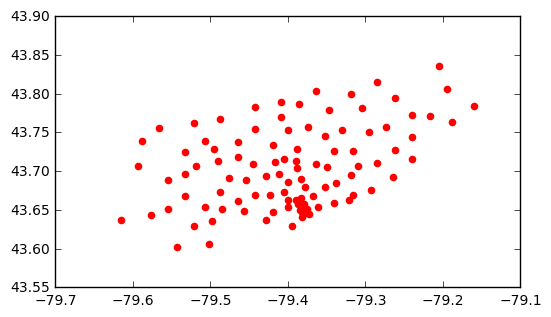

In [92]:
gdf.plot(ax=ax, color='red')
plt.show()